# Project CCHAIN data pre-processing

## import relevant packages

In [1]:
import pandas as pd
import os
import time

from IPython.display import clear_output
start = time.time()

## check for dataset

In [2]:
data_folder = "CCHAIN_database"
local_directory = os.getcwd()

if data_folder not in os.listdir(local_directory):
    print(data_folder, os.listdir(local_directory))
    raise Exception("CCHAIN_database folder not found, please create it first.")
    
filename_list = os.listdir(local_directory+"\\"+data_folder)
if 'brgy_geography.csv' not in filename_list:
    raise Exception("Project CCHAIN files not found, please download and unpack the dataset into the /CCHAIN_database folder first")
    
if 'prepared_data' in os.listdir(local_directory):
    confirm = input("prepared_data folder already exists, are you sure you want to rerun the data preparation?\nif you continue, this will take ~20 minutes \nY/N:")
    if confirm != 'Y':
        raise SystemExit("Cancelling runtime!")

prepared_data folder already exists, are you sure you want to rerun the data preparation?
if you continue, this will take ~20 minutes 
Y/N:Y


## load all the tables

In [3]:
df_name_list = []

for i, filename in enumerate(filename_list):
    clear_output(wait=True)
    
    print(f"Files read/Total files: {i}/{len(filename_list)}")
    df_name = filename.split('.')[0].lower()
    df_name_list += df_name
    print(f"Reading: {filename}")
    df = pd.read_csv(local_directory+"\\"+data_folder+"\\"+filename)
    globals()[df_name] = df

Files read/Total files: 29/30
Reading: worldpop_population.csv


## create the base barangay dataframe

In [4]:
brgy = location[['adm3_en','adm3_pcode','adm4_en','adm4_pcode']]
base_barangay_df = pd.merge(brgy.assign(key=1), calendar.assign(key=1), on='key').drop('key', axis=1)
base_barangay_df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date
0,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-01
1,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-02
2,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-03
3,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-04
4,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-05
...,...,...,...,...,...
6421090,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27
6421091,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28
6421092,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29
6421093,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30


## append climate data to barangay dataframe

In [5]:
df_with_climate_data = pd.merge(base_barangay_df, climate_atmosphere, on=['adm4_pcode','date'])
df_with_climate_data = df_with_climate_data.drop(['freq', 'uuid'], axis = 1)
df_with_climate_data

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,wind_speed,rh,solar_rad,uv_rad
0,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-01,26.85,24.49,30.17,27.91,0.0,2.00,68.59,193.62,23.77
1,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-02,25.95,23.13,29.70,26.34,0.0,4.54,60.56,211.05,24.21
2,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-03,25.07,22.49,28.59,25.67,0.0,1.53,68.47,199.69,23.15
3,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-04,25.55,22.11,29.81,25.90,0.0,3.10,61.32,222.02,24.83
4,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-05,25.35,22.68,29.33,25.72,0.0,4.23,60.50,203.69,23.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421090,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,2.81,70.32,120.84,14.76
6421091,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,2.55,70.91,134.82,16.43
6421092,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,1.80,74.08,59.58,7.38
6421093,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,0.78,72.41,139.43,17.06


## append osm_poi_health data to barangay dataframe

In [6]:
df_with_climate_data['date'] = pd.to_datetime(df_with_climate_data['date'])
df_with_climate_data['year'] = df_with_climate_data['date'].dt.year
df_barangay_health_poi = osm_poi_health
df_barangay_health_poi['date'] = pd.to_datetime(df_barangay_health_poi['date'])
df_barangay_health_poi['year'] = df_barangay_health_poi['date'].dt.year
df_barangay_health_poi = df_barangay_health_poi.drop(['date'],axis=1)

df = pd.merge(df_with_climate_data, right=df_barangay_health_poi, on=["year","adm4_pcode"], how="left").drop(['freq','uuid','year'],axis=1)
df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,dentist_count,dentist_nearest,doctors_count,doctors_nearest,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest
0,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-01,26.85,24.49,30.17,27.91,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-02,25.95,23.13,29.70,26.34,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-03,25.07,22.49,28.59,25.67,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-04,25.55,22.11,29.81,25.90,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-05,25.35,22.68,29.33,25.72,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421090,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336
6421091,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336
6421092,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336
6421093,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336


## append population data to barangay dataframe

In [7]:
df_barangay_population = worldpop_population
df_barangay_population['date'] = pd.to_datetime(df_barangay_population['date'])
df_barangay_population['year'] = df_barangay_population['date'].dt.year

df['year'] = df['date'].dt.year

df = pd.merge(df, right=df_barangay_population[['year','adm4_pcode','pop_count_total','pop_density_mean']], on=['adm4_pcode','year'], how='left')
df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,doctors_nearest,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest,year,pop_count_total,pop_density_mean
0,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-01,26.85,24.49,30.17,27.91,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806
1,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-02,25.95,23.13,29.70,26.34,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806
2,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-03,25.07,22.49,28.59,25.67,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806
3,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-04,25.55,22.11,29.81,25.90,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806
4,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-05,25.35,22.68,29.33,25.72,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421090,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN
6421091,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN
6421092,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN
6421093,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN


## append barangay geographical data to barangay dataframe

In [8]:
df = pd.merge(df, right=brgy_geography[['brgy_total_area', 'adm4_pcode']], on=["adm4_pcode"], how='left')
df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest,year,pop_count_total,pop_density_mean,brgy_total_area
0,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-01,26.85,24.49,30.17,27.91,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806,1.0216
1,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-02,25.95,23.13,29.70,26.34,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806,1.0216
2,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-03,25.07,22.49,28.59,25.67,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806,1.0216
3,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-04,25.55,22.11,29.81,25.90,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806,1.0216
4,Dagupan City,PH015518000,Lomboy,PH015518016,2003-01-05,25.35,22.68,29.33,25.72,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,632.475342,695.088806,1.0216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421090,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661
6421091,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661
6421092,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661
6421093,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661


## convert barangay dataframe from 'daily' to 'weekly'

In [9]:
import datetime

df['week'] = df['date'].apply(lambda x: datetime.date(x.year,x.month,x.day).isocalendar()[1])
df['year'] = df['date'].apply(lambda x: datetime.date(x.year,x.month,x.day).isocalendar()[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421095 entries, 0 to 6421094
Data columns (total 31 columns):
 #   Column            Dtype         
---  ------            -----         
 0   adm3_en           object        
 1   adm3_pcode        object        
 2   adm4_en           object        
 3   adm4_pcode        object        
 4   date              datetime64[ns]
 5   tave              float64       
 6   tmin              float64       
 7   tmax              float64       
 8   heat_index        float64       
 9   pr                float64       
 10  wind_speed        float64       
 11  rh                float64       
 12  solar_rad         float64       
 13  uv_rad            float64       
 14  clinic_count      float64       
 15  clinic_nearest    float64       
 16  dentist_count     float64       
 17  dentist_nearest   float64       
 18  doctors_count     float64       
 19  doctors_nearest   float64       
 20  hospital_count    float64       
 21  hospital

In [11]:
import numpy as np
import time

static_columns = [
    'adm3_en',
    'adm3_pcode',
    'adm4_en',
    'adm4_pcode',
]
min_columns = [
    'date'
]
standard_average_columns = [
    'clinic_count',
    'dentist_count',
    'doctors_count',
    'hospital_count',
    'optician_count',
    'pharmacy_count',
    'clinic_nearest',
    'dentist_nearest',
    'doctors_nearest',
    'hospital_nearest',
    'optician_nearest',
    'pharmacy_nearest',
    'pop_count_total',
    'pop_density_mean',
]
weighted_average_columns = [
    'tave',
    'tmin',
    'tmax', 
    'heat_index',
    'pr',
    'wind_speed',
    'rh',
    'solar_rad',
    'uv_rad',
]

dfs_to_merge = []
by = ['year','week','adm4_pcode']
df.fillna(0)

def group_weighted_averages(df, weights, values, by):
    return df.groupby(by, dropna=False).apply(lambda x: np.average(x[values],weights=x[weights]))

def group_standard_averages(df, values, by):
    return df.groupby(by, dropna=False)[column].mean()

for i, column in enumerate(weighted_average_columns):
    print(f"grouping {column} from df")
    dfs_to_merge.append(group_weighted_averages(df, weights='brgy_total_area', values=column, by=by))
    print(dfs_to_merge[i])
    clear_output(wait=True)
    
for i, column in enumerate(standard_average_columns):
    print(f"grouping {column} from df")
    dfs_to_merge.append(group_standard_averages(df, values=column, by=by))
    clear_output(wait=True)
    
clear_output(wait=True)
print("done!")
merged_df = pd.concat(dfs_to_merge, axis = 1, keys = weighted_average_columns+standard_average_columns)

done!


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 917676 entries, (2003, 1, 'PH015518001') to (2022, 52, 'PH137603009')
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tave              917676 non-null  float64
 1   tmin              917676 non-null  float64
 2   tmax              917676 non-null  float64
 3   heat_index        917676 non-null  float64
 4   pr                916632 non-null  float64
 5   wind_speed        917676 non-null  float64
 6   rh                917676 non-null  float64
 7   solar_rad         917676 non-null  float64
 8   uv_rad            917676 non-null  float64
 9   clinic_count      413130 non-null  float64
 10  dentist_count     413130 non-null  float64
 11  doctors_count     413130 non-null  float64
 12  hospital_count    413130 non-null  float64
 13  optician_count    413130 non-null  float64
 14  pharmacy_count    413130 non-null  float64
 15  clinic_nearest    413130 n

## append disease_lgu_disaggregated_totals to df 

### also do an inner join (i.e. retain rows with mutual primary keys)

In [13]:
df = merged_df.reset_index()

df_disease = disease_lgu_disaggregated_totals
df_disease['date'] = pd.to_datetime(df_disease['date'])
df_disease['week'] = df_disease['date'].apply(lambda x: datetime.date(x.year,x.month,x.day).isocalendar()[1])
df_disease['year'] = df_disease['date'].apply(lambda x: datetime.date(x.year,x.month,x.day).isocalendar()[0])
df_disease = df_disease.drop(df_disease[df_disease.freq == 'M'].index)
df_disease = df_disease.drop(['uuid','freq','source_filename','adm3_pcode','source_name','disease_icd10_code','date'], axis=1)
df_disease = df_disease.groupby(by=['adm4_pcode','disease_common_name','sex','age_group','week','year']).sum().reset_index()
df = df.drop(df[df['year'] < 2010].index)
df = pd.merge(df, right=df_disease, on=["adm4_pcode", 'year', 'week'], how='inner')

## convert categorical to numerical values

In [14]:
df['sex'] = df['sex'].astype('category')
df['age_group'] = df['age_group'].astype('category')

cat_columns = df.select_dtypes(['category']).columns
cat_mappings = {}
for column in cat_columns:
    cat_mappings[column] = df[column].cat.categories
    print(f"{column} categorical mapping:")
    for i, category in enumerate(cat_mappings[column]):
        print(f"{i}:\t{category}")
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df[cat_columns]

sex categorical mapping:
0:	F
1:	M
age_group categorical mapping:
0:	0-4
1:	10-19
2:	20-29
3:	30-39
4:	40-49
5:	5-10
6:	5-9
7:	50-59
8:	60+


,sex,age_group
0,0,1
1,1,6
2,0,6
3,1,1
4,1,0
...,...,...
43357,0,6
43358,1,1
43359,0,0
43360,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43362 entries, 0 to 43361
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 43362 non-null  int64  
 1   week                 43362 non-null  int64  
 2   adm4_pcode           43362 non-null  object 
 3   tave                 43362 non-null  float64
 4   tmin                 43362 non-null  float64
 5   tmax                 43362 non-null  float64
 6   heat_index           43362 non-null  float64
 7   pr                   43346 non-null  float64
 8   wind_speed           43362 non-null  float64
 9   rh                   43362 non-null  float64
 10  solar_rad            43362 non-null  float64
 11  uv_rad               43362 non-null  float64
 12  clinic_count         40036 non-null  float64
 13  dentist_count        40036 non-null  float64
 14  doctors_count        40036 non-null  float64
 15  hospital_count       40036 non-null 

## split dataset by disease type

In [16]:
import json
df_dict = {}
for disease in df['disease_common_name'].unique():
    df_dict[disease] = df[df['disease_common_name']==disease]
    df_dict[disease] = df_dict[disease].drop(['disease_common_name'],axis=1)
df_dict.keys()    

dict_keys(['HEPATITIS A', 'TYPHOID FEVER', 'LEPTOSPIROSIS', 'CHOLERA', 'DENGUE FEVER', 'RABIES', 'ACUTE BLOODY DIARRHEA', 'CHIKUNGUYA VIRAL DISEASE', 'ROTAVIRAL ENTERITIS'])

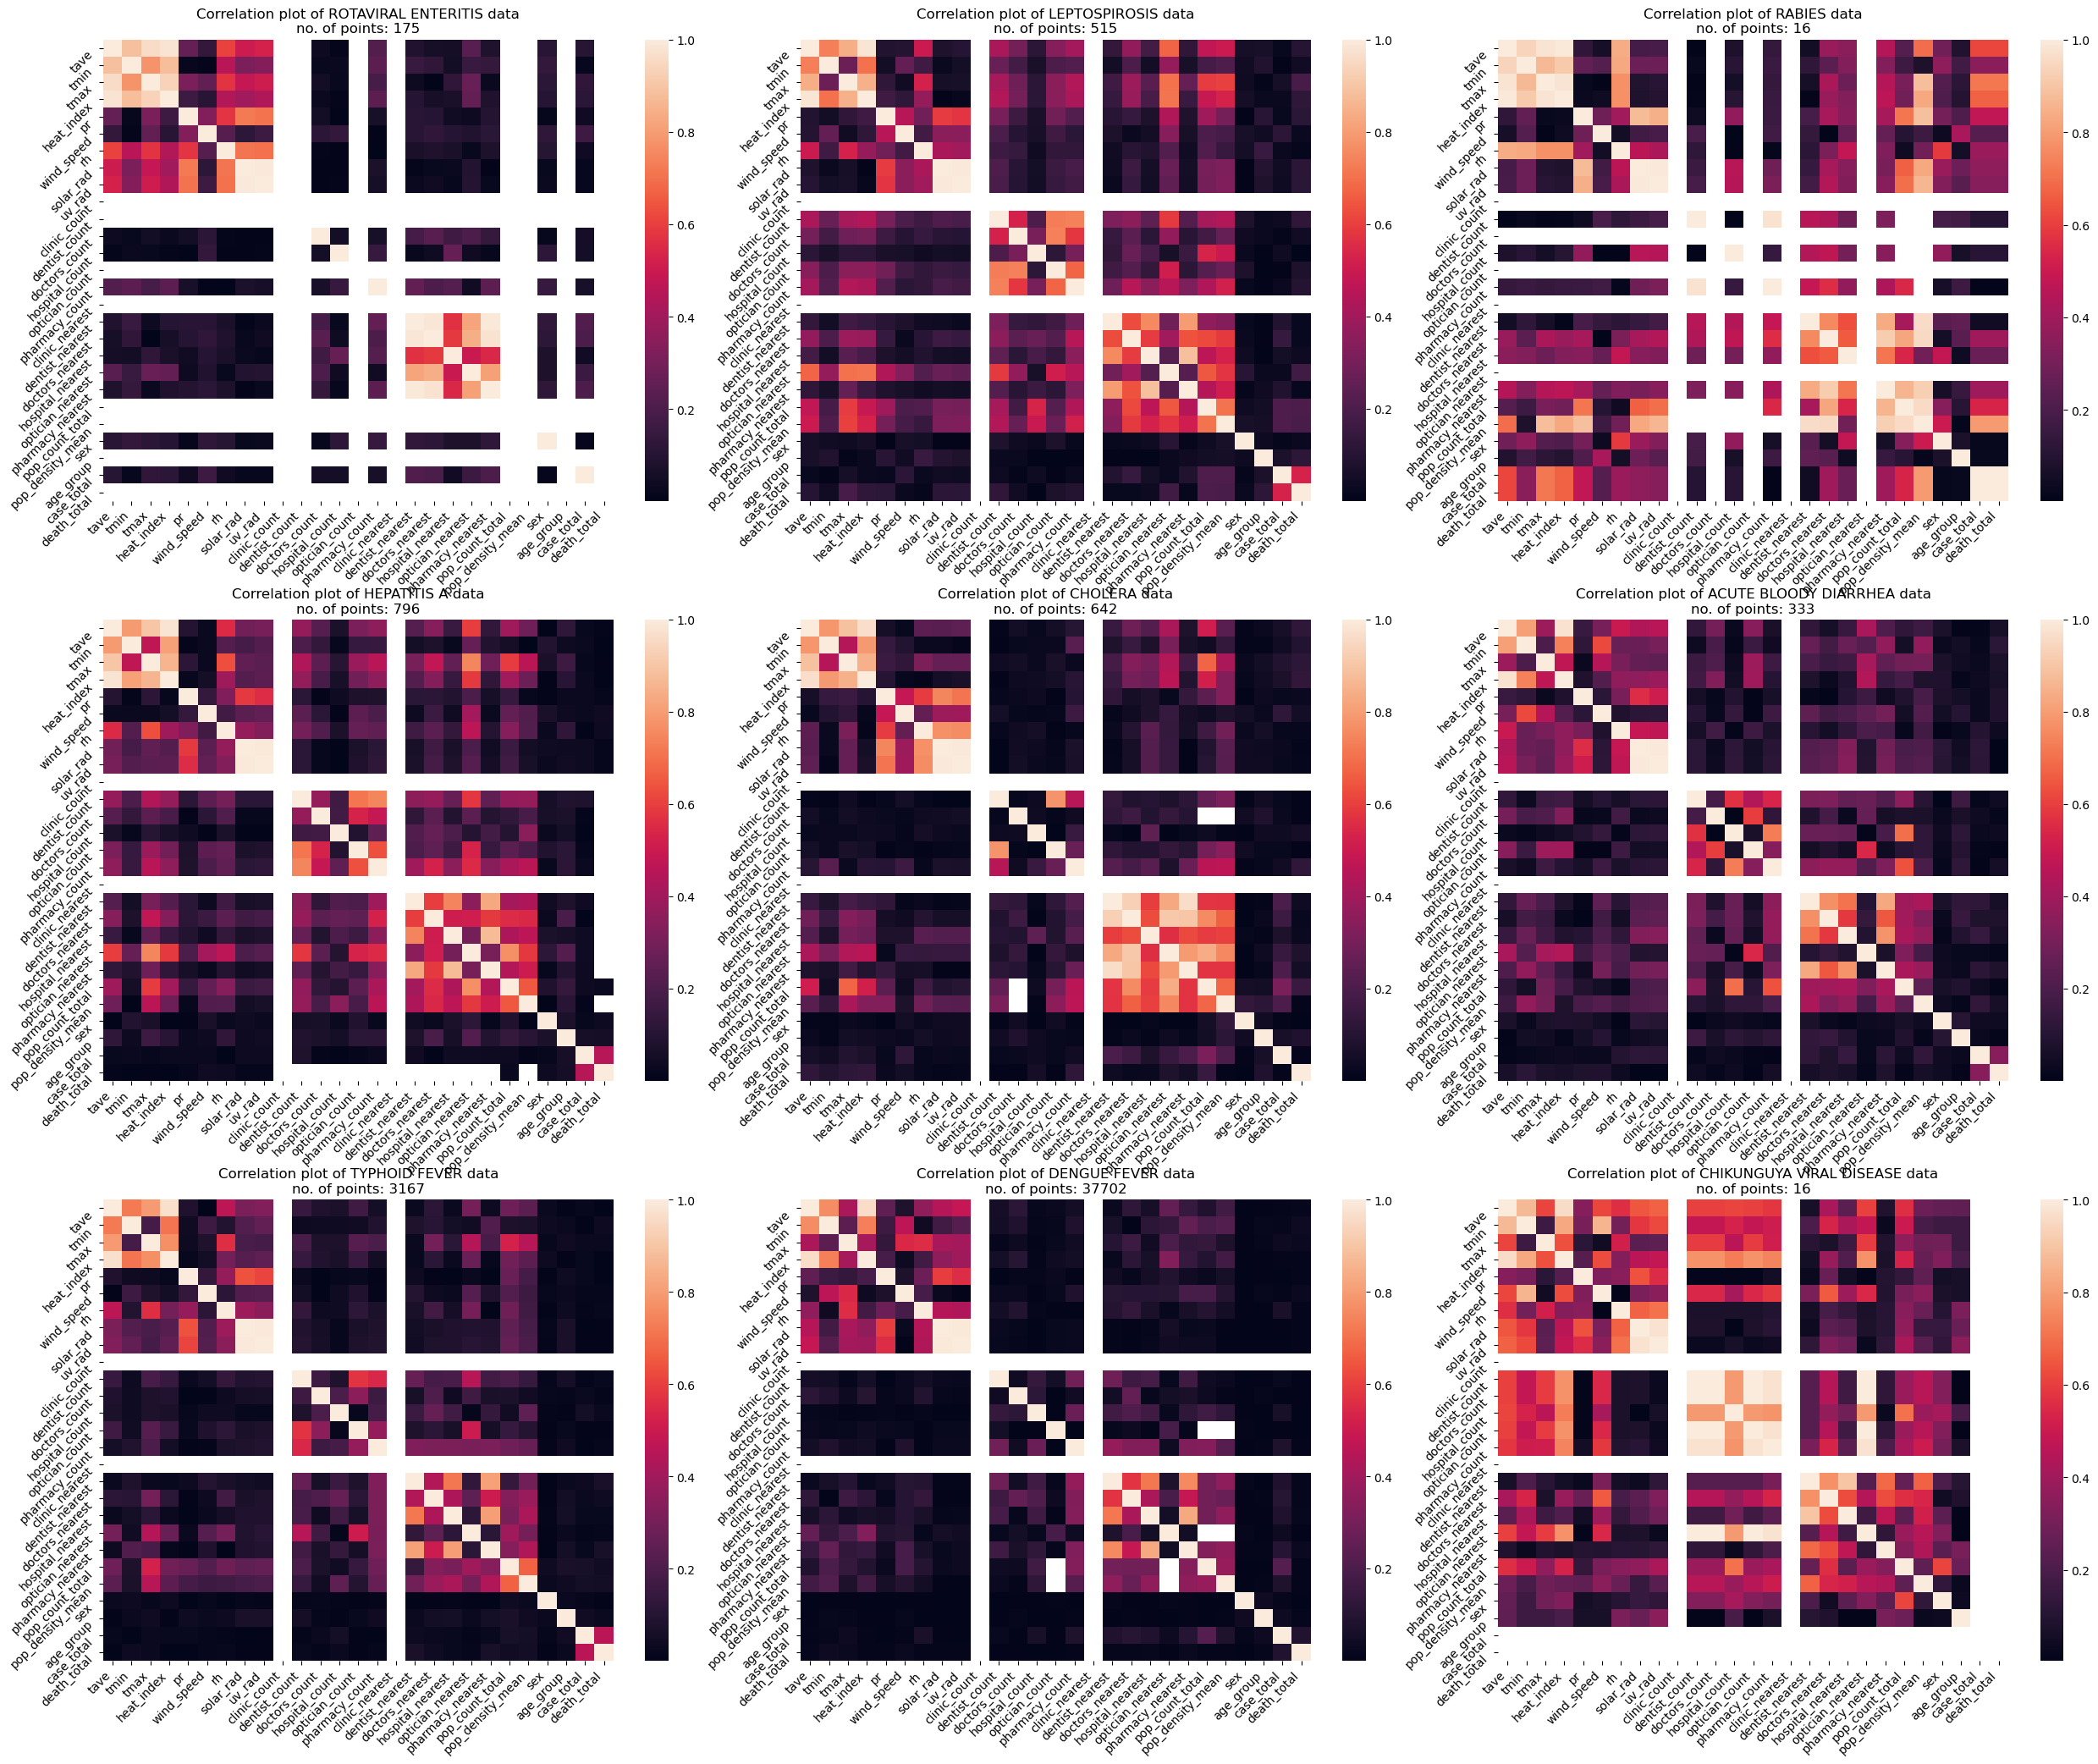

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

r = 3
c = 3
fig, ax = plt.subplots(r, c, figsize=(25,20))
fig.tight_layout(pad = 2,h_pad=8)
disease_keys = list(df_dict.keys())

for x in range(r):
    for y in range(c):
        disease = disease_keys[(x+y*3)-1]
        heatmap_data = df_dict[disease].drop(['year','week','adm4_pcode'],axis=1).corr()
        heatmap_data = heatmap_data.apply(lambda i: abs(i))
        sns.heatmap(heatmap_data, vmax=1, ax=ax[x, y])
        ax[x, y].set_xticks(ax[x, y].get_xticks(),rotation=45,labels=ax[x, y].get_xticklabels(),ha='right',va='top')
        ax[x, y].set_yticks(ax[x, y].get_yticks(),rotation=45,labels=ax[x, y].get_yticklabels(),ha='right',va='top')
        ax[x, y].set_title(f"Correlation plot of {disease} data\nno. of points: {len(df_dict[disease])}")
        ax[x, y].plot()


# save data into /prepared_data folder for use.

In [18]:
if 'prepared_data' not in os.listdir():
    os.mkdir('prepared_data')

for disease in df_dict.keys():
    df_dict[disease].to_csv(f'{local_directory}/prepared_data/{disease}.csv')

In [19]:
for i, column in enumerate(cat_mappings.keys()):
    df_cat = pd.DataFrame({f'{column}':cat_mappings[column]}).reset_index(names='cat_code')
    df_cat.to_csv(f'{local_directory}/prepared_data/{column}_cat_codes.csv')
    print(df_cat)

   cat_code sex
0         0   F
1         1   M
   cat_code age_group
0         0       0-4
1         1     10-19
2         2     20-29
3         3     30-39
4         4     40-49
5         5      5-10
6         6       5-9
7         7     50-59
8         8       60+


In [20]:
stop = time.time()
print(f"Total execution time: {time.strftime('%H:%M:%S', time.gmtime(stop-start))}")

Total execution time: 00:18:00
